# Implementación de métodos de regresión

#### Óscar Alfonso Gómez Sepúlveda
#### 2198577

## Objetivos

* Generar un código que recopile los códigos enviados por el profesor para evaluar todos los métodos de linealización y ver cual se ajusta de mejor manera a los datos.
* Visualizar en una gráfica para cada método la desviación estándar para ver cual tiene un mejor ajuste.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from ipysheet import sheet, cell, row, column, cell_range, to_array, to_dataframe
import ipywidgets as widgets
from ipywidgets import interact, interactive, FloatSlider, IntText
from IPython.display import clear_output
from matplotlib.pyplot import figure
import pandas as pd
from time import process_time_ns

* "# de Filas" permite seleccionar el número de datos a ingresar verticalmente

In [2]:
xx = widgets.IntText(value=50, description='# de Filas:', disabled=False)
display(xx)

IntText(value=50, description='# de Filas:')

* Se generan los datos mediante herramienta random siguendo una curva
* Los datos pueden ser modificados con las flechas 

In [3]:
#https://ipysheet.readthedocs.io/en/latest/
number_row = xx.value
mu, sigma = 0.2, 1 # mean and standard deviation
a = np.linspace(1, 50, num=number_row)
x = 1
b = abs(a**x + 10*(np.random.normal(mu, sigma, a.size)))

sheet1 = sheet(rows=number_row, columns=2)

column1 = column(0, [IntText(value=a[_]) for _ in range(number_row)])
column2 = column(1, [IntText(value=b[_]) for _ in range(number_row)])

sheet1

Sheet(cells=(Cell(column_end=0, column_start=0, row_end=49, row_start=0, squeeze_row=False, type='widget', val…

* Visualización de datos en tabla

In [4]:
df = pd.DataFrame(data=to_dataframe(sheet1))
t = df['A'].to_numpy()
y = df['B'].to_numpy()
df

,A,B
0,1.0,8.0
1,2.0,8.0
2,3.0,5.0
3,4.0,21.0
4,5.0,10.0
5,6.0,10.0
6,7.0,22.0
7,8.0,5.0
8,9.0,4.0
9,10.0,9.0


In [5]:
s = np.ones(t.size)
A = np.column_stack((s,t))
n = t.size

### Linear regression - First approach

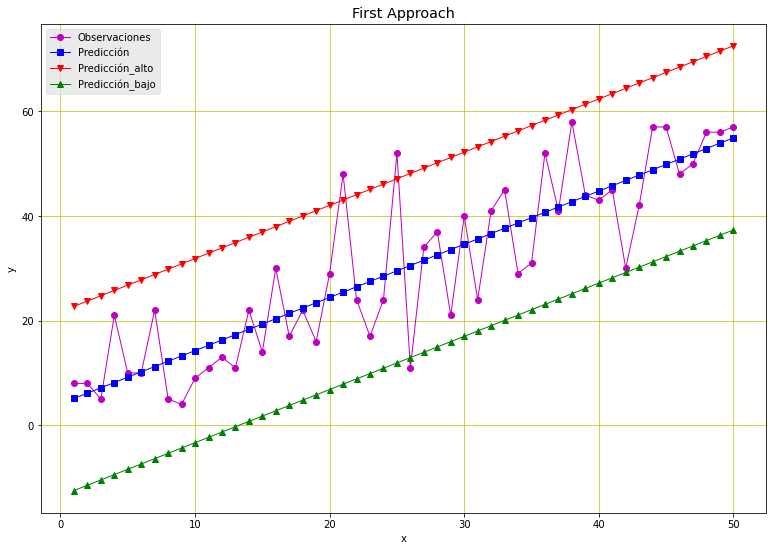

In [6]:
start_f = process_time_ns()
x_hat = np.linalg.solve(np.dot(np.transpose(A),A), np.dot(np.transpose(A), y))
y_hat = np.dot(A, x_hat)

# Error

res = (y-y_hat)  #Residual calculation
res_squared = (res)**2
J_f = np.sum(res**2)  # Cost function
SD = np.sqrt(J_f/(n-2))  #Standard Error of the estimate n= is the number of observations

alpha_predicted_low = (-2*SD) + y_hat
alpha_predicted_high = (2*SD) + y_hat


figure(figsize=(13,9))
plt.plot(t,y, "o-", lw=1, color = 'm', label = 'Observaciones')
plt.plot(t, y_hat, "-s", lw=1, color = 'b', label = 'Predicción')
plt.plot(t,alpha_predicted_high, "v-", lw=1, color = 'r', label = 'Predicción_alto')
plt.plot(t,alpha_predicted_low, "^-", lw=1, color = 'g', label = 'Predicción_bajo')
plt.style.use("ggplot")
plt.legend(loc=2)
plt.title('First Approach')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='y', linestyle='-', linewidth=0.7)
stop_f = process_time_ns()
time_f = stop_f - start_f

### SVD

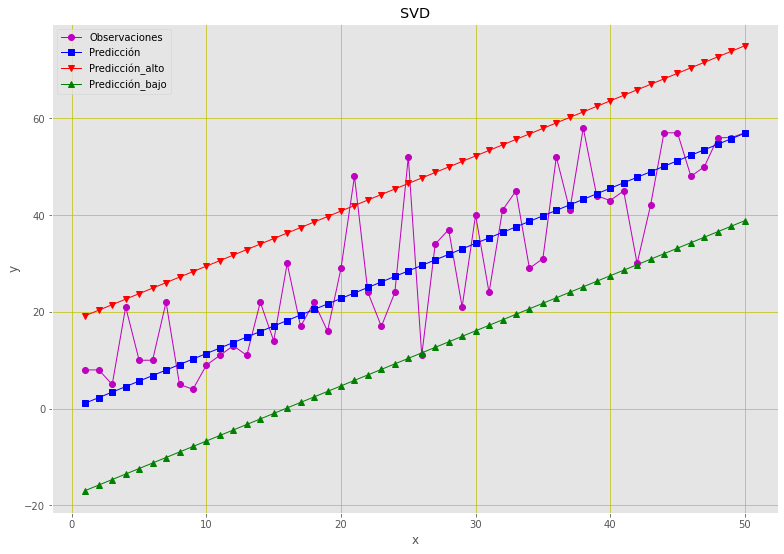

In [7]:
start_svd = process_time_ns()
u, s, vh = np.linalg.svd(A, full_matrices=False)
# Least-square fit
xtilde = np.dot(np.transpose(u[:,0]), y)/np.dot(vh[0,1],s[0])
#xtilde = np.linalg.solve(np.dot(vh[0,1],s[0]), np.dot(np.transpose(u[:,0]), b))
# Plot fit
y_svd = np.dot(xtilde,t)

# Error

res = (y-y_svd)  #Residual calculation
res_squared = (res)**2
J_svd = np.sum(res**2)  # Cost function
SD = np.sqrt(J_svd/(n-2))  #Standard Error of the estimate n= is the number of observations

alpha_predicted_low = (-2*SD) + y_svd
alpha_predicted_high = (2*SD) + y_svd

figure(figsize=(13,9))
plt.plot(t,y, "o-", lw=1, color = 'm', label = 'Observaciones')
plt.plot(t, y_svd, "-s", lw=1, color = 'b', label = 'Predicción')
plt.plot(t,alpha_predicted_high, "v-", lw=1, color = 'r', label = 'Predicción_alto')
plt.plot(t,alpha_predicted_low, "^-", lw=1, color = 'g', label = 'Predicción_bajo')
plt.style.use("ggplot")
plt.legend(loc=2)
plt.title('SVD')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='y', linestyle='-', linewidth=0.7)
stop_svd = process_time_ns()
time_svd = stop_svd - start_svd

### Power Model

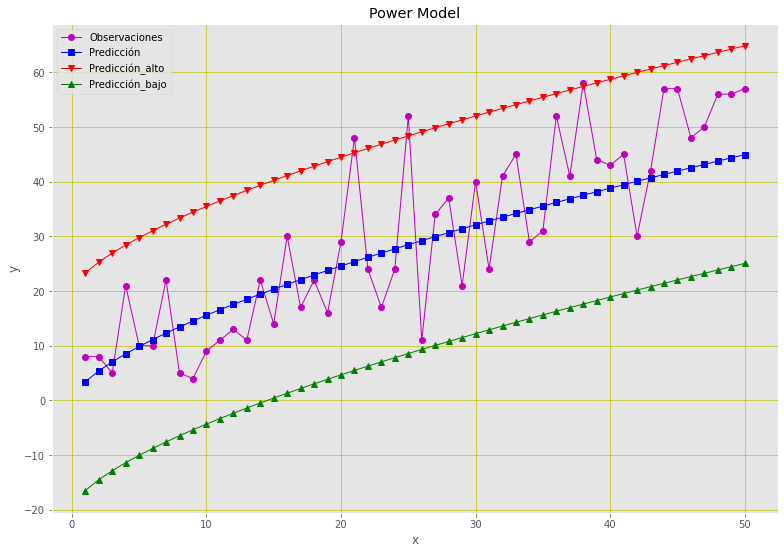

In [8]:
start_power = process_time_ns()
z = np.log(y)   # z_i
w = np.log(t)   #  w_i
a1 = ((n*np.sum(w*np.transpose(z)))-(np.sum(z)*np.sum(w)))/((n*np.sum(w**2))-(np.sum(w)**2)) # a_1
a0 = np.mean(z)-(a1*np.mean(w))  # a_0
a = math.exp(a0); # a
b = a1      # b
q = a*t**b # Prediction of flow rate

# Error

res = (y-q)  #Residual calculation
res_squared = (res)**2
J_power = np.sum(res**2)  # Cost function
SD = np.sqrt(J_power/(n-2))  #Standard Error of the estimate n= is the number of observations

alpha_predicted_low = (-2*SD) + q
alpha_predicted_high = (2*SD) + q

figure(figsize=(13,9))
plt.plot(t,y, "o-", lw=1, color = 'm', label = 'Observaciones')
plt.plot(t, q, "-s", lw=1, color = 'b', label = 'Predicción')
plt.plot(t,alpha_predicted_high, "v-", lw=1, color = 'r', label = 'Predicción_alto')
plt.plot(t,alpha_predicted_low, "^-", lw=1, color = 'g', label = 'Predicción_bajo')
plt.style.use("ggplot")
plt.legend(loc=2)
plt.title('Power Model')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='y', linestyle='-', linewidth=0.7)
stop_power = process_time_ns()
time_power = stop_power - start_power

### Exponential Model

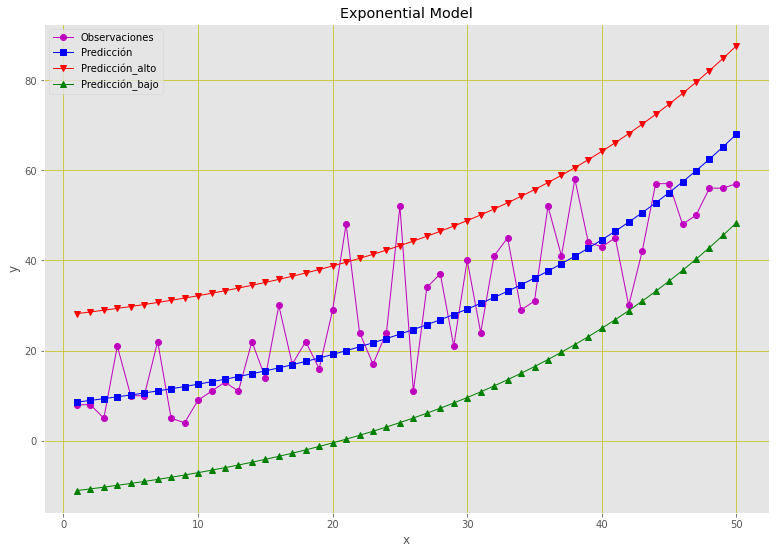

In [9]:
start_e = process_time_ns()

z = np.log(y)
a_1 = (n*np.sum(z*np.transpose(t))-(np.sum(z)*np.sum(t)))/(n*np.sum(t**2)-np.sum(t)**2)
a_0 = np.mean(z)-(a_1*np.mean(t))
a = math.exp(a_0)
g = a*np.exp(t*a_1)

#Error

res = (y-g)  #Residual calculation
res_squared = (res)**2
J_e = np.sum(res**2)  # Cost function
SD = np.sqrt(J_e/(n-2))  #Standard Error of the estimate n= is the number of observations

alpha_predicted_low = (-2*SD) + g
alpha_predicted_high = (2*SD) + g


figure(figsize=(13,9))
plt.plot(t,y, "o-", lw=1, color = 'm', label = 'Observaciones')
plt.plot(t, g, "-s", lw=1, color = 'b', label = 'Predicción')
plt.plot(t,alpha_predicted_high, "v-", lw=1, color = 'r', label = 'Predicción_alto')
plt.plot(t,alpha_predicted_low, "^-", lw=1, color = 'g', label = 'Predicción_bajo')
plt.style.use("ggplot")
plt.legend(loc=2)
plt.title('Exponential Model')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='y', linestyle='-', linewidth=0.7)
stop_e = process_time_ns()
time_e = stop_e - start_e

### Saturation Growth Model

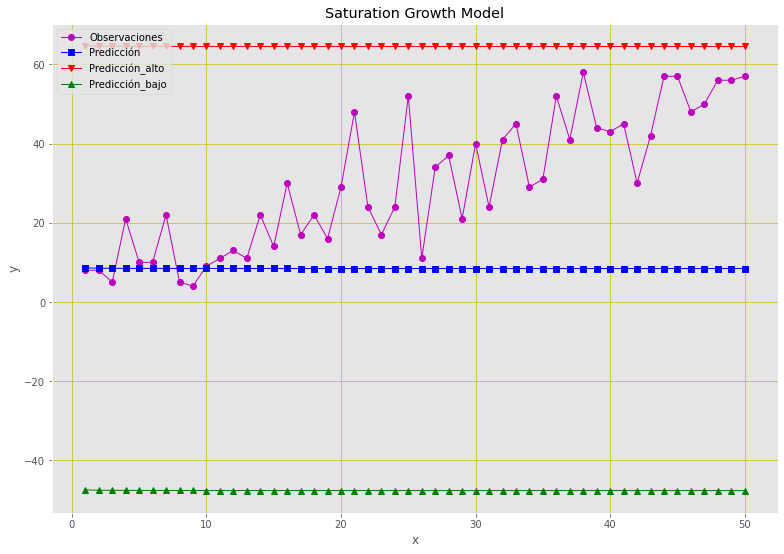

In [10]:
start_s = process_time_ns()
z = 1/y

a_1 = (n*np.sum(z*np.transpose(t))-(np.sum(z)*np.sum(t)))/(n*np.sum(t**2)-np.sum(t)**2)
a_0 = np.mean(z)-(a_1*np.mean(t))
b = a_1/a_0
a = 1/a_0

y_s = a*t/(b + t)

# Error

res = (y-y_s)  #Residual calculation
res_squared=(res)**2
J_s = np.sum(res**2)  # Cost function
SD = np.sqrt(J_s/(n-2))  #Standard Error of the estimate n= is the number of observations

alpha_predicted_low = (-2*SD) + y_s
alpha_predicted_high = (2*SD) + y_s

figure(figsize=(13,9))
plt.plot(t,y, "o-", lw=1, color = 'm', label = 'Observaciones')
plt.plot(t, y_s, "-s", lw=1, color = 'b', label = 'Predicción')
plt.plot(t,alpha_predicted_high, "v-", lw=1, color = 'r', label = 'Predicción_alto')
plt.plot(t,alpha_predicted_low, "^-", lw=1, color = 'g', label = 'Predicción_bajo')
plt.style.use("ggplot")
plt.legend(loc=2)
plt.title('Saturation Growth Model')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='y', linestyle='-', linewidth=0.7)
stop_s = process_time_ns()
time_s = stop_s - start_s

### Harmonic Declive

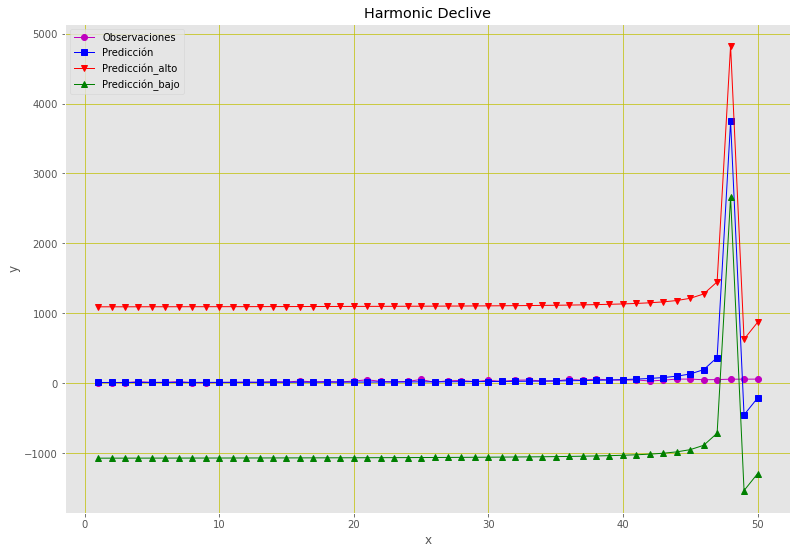

In [11]:
start_h = process_time_ns()

z = 1/y
a_1 = (n*np.sum(z*np.transpose(t))-(np.sum(z)*np.sum(t)))/(n*np.sum(t**2)-np.sum(t)**2)
a_0 = np.mean(z)-(a_1*np.mean(t))
b = 1/a_0
a = a_1*b
y1 = b/(1+(a*t))

# Error

res = (y-y1)  #Residual calculation
res_squared=(res)**2
J_h = np.sum(res**2)  # Cost function
SD = np.sqrt(J_h/(n-2))  #Standard Error of the estimate n= is the number of observations

alpha_predicted_low = (-2*SD) + y1
alpha_predicted_high = (2*SD) + y1

figure(figsize=(13,9))
plt.plot(t,y, "o-", lw=1, color = 'm', label = 'Observaciones')
plt.plot(t, y1, "-s", lw=1, color = 'b', label = 'Predicción')
plt.plot(t,alpha_predicted_high, "v-", lw=1, color = 'r', label = 'Predicción_alto')
plt.plot(t,alpha_predicted_low, "^-", lw=1, color = 'g', label = 'Predicción_bajo')
plt.style.use("ggplot")
plt.legend(loc=2)
plt.title('Harmonic Declive')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='y', linestyle='-', linewidth=0.7)
stop_h = process_time_ns()
time_h = stop_h - start_h

### Polynomial Model

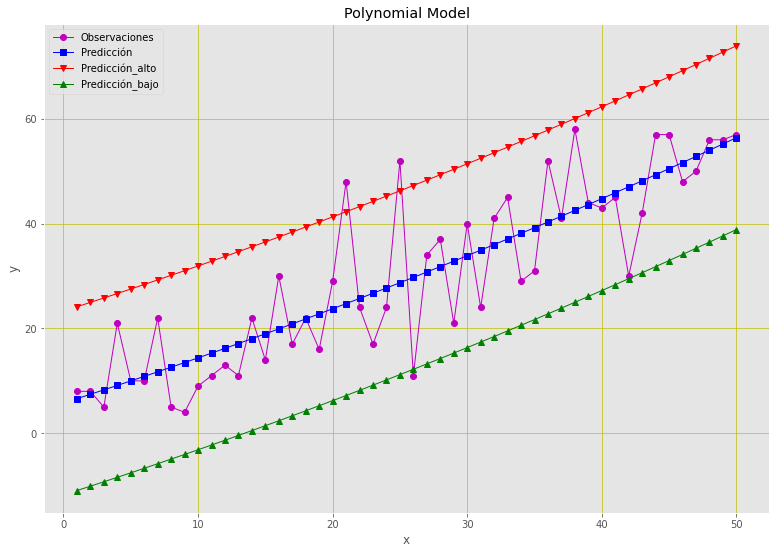

In [12]:
start_poly = process_time_ns()
A = np.array([(n, np.sum(t), np.sum(t**2)), (np.sum(t), np.sum(t**2), np.sum(t**3)), (np.sum(t**2), np.sum(t**3), np.sum(t**4))])
b = np.array([np.sum(y), np.sum(np.dot(y, np.transpose(t))), np.sum(np.dot(y, np.transpose(t**2)))])
x = np.linalg.solve(A,b)
alpha_predicted = x[0]+x[1]*t+x[2]*t**2

# Error

res = (y-alpha_predicted)  #Residual calculation
res_squared=(res)**2
J_poly = np.sum(res**2)  # Cost function
SD = np.sqrt(J_poly/(n-2))  #Standard Error of the estimate n= is the number of observations

alpha_predicted_low = (x[0] - 2*SD) + x[1]*t + x[2]*t**2
alpha_predicted_high = (x[0] + 2*SD) + x[1]*t + x[2]*t**2


figure(figsize=(13,9))
plt.plot(t,y, "o-", lw=1, color = 'm', label = 'Observaciones')
plt.plot(t, alpha_predicted, "-s", lw=1, color = 'b', label = 'Predicción')
plt.plot(t,alpha_predicted_high, "v-", lw=1, color = 'r', label = 'Predicción_alto')
plt.plot(t,alpha_predicted_low, "^-", lw=1, color = 'g', label = 'Predicción_bajo')
plt.style.use("ggplot")
plt.legend(loc=2)
plt.title('Polynomial Model')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='y', linestyle='-', linewidth=0.7)
stop_poly = process_time_ns()
time_poly = stop_poly - start_poly

### Comparación gráfica de todos los métodos

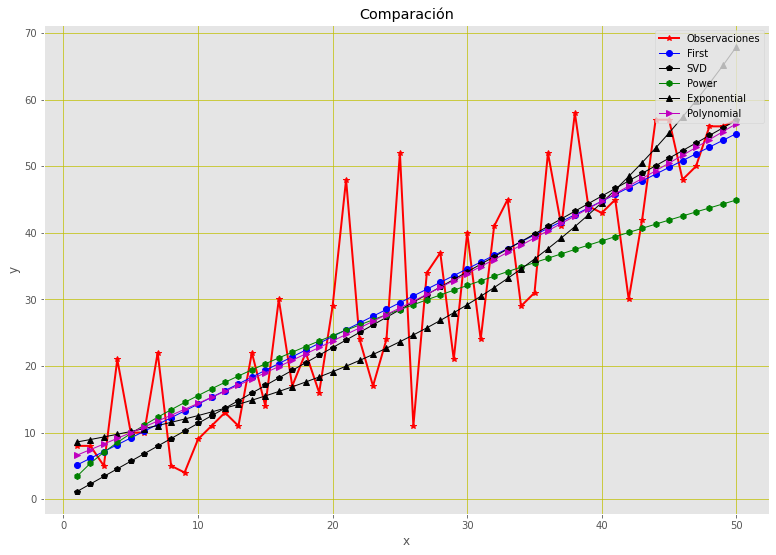

In [13]:
figure(figsize=(13,9))

plt.plot(t,y, "*-", lw=2, color = 'r', label = 'Observaciones')
plt.plot(t, y_hat, "-o", lw=1, color = 'b', label = 'First')
plt.plot(t, y_svd, "p-", lw=1, color = 'k', label = 'SVD')
plt.plot(t,q, "-h", lw=1, color = 'g', label = 'Power')
plt.plot(t,g, "-^", lw=1, color = 'k', label = 'Exponential')
#plt.plot(t,y_s, "-v", lw=1, color = 'c', label = 'Saturation')
#plt.plot(t,y1, "-<", lw=1, color = 'y', label = 'Harmonic')
plt.plot(t,alpha_predicted, "->", color = 'm', lw=1, label = 'Polynomial')
plt.grid(color='y', linestyle='-', linewidth=0.7)
plt.title('Comparación')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=1)

## Resultado Final

* Se presenta J que es el costo de la función para modelo, permite comparar con la siguiente ecuación:

$$J = \sum {R^2}$$

donde $R$ representa el residuo para cada dato


[3713.7370468187273, 3918.2301266303266, 4748.973, 4614.4087, 37758.48, 14066022.0, 3688.991]


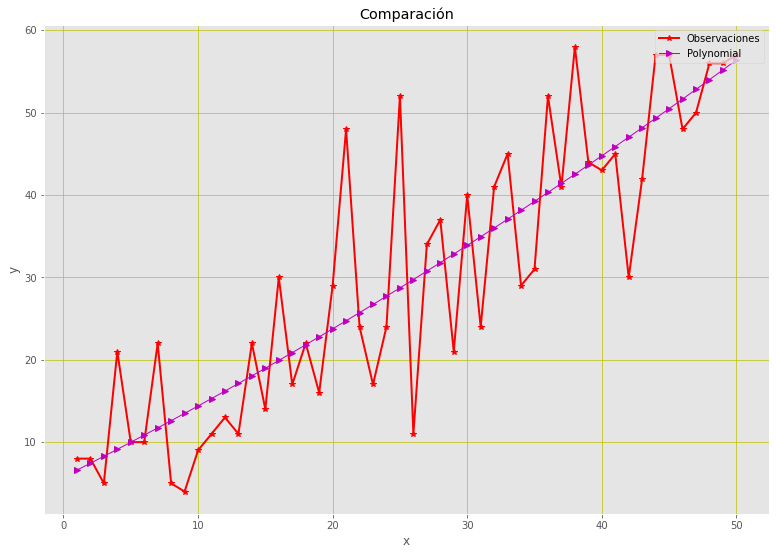

In [14]:
J = [J_f, J_svd, J_power, J_e, J_s, J_h, J_poly]
Models = ['First Approch', 'SVD', 'Power', 'Exponential', 'Saturation', 'Harmonic', 'Polynomial']


mi = np.amin(J)
index = np.where(J == np.amin(J))
Index_method = index[0]
method = Models[Index_method[0]]
print(J)
if(mi == J_f):
    y_final = y_hat

if(mi == J_svd):
    y_final = y_svd
    
if(mi == J_power):
    y_final = q

if(mi == J_e):
    y_final = g

if(mi == J_s):
    y_final = y_s
    
if(mi == J_h):
    y_final = y_1
    
if(mi == J_poly):
    y_final = alpha_predicted

figure(figsize=(13,9))

plt.plot(t,y, "*-", lw=2, color = 'r', label = 'Observaciones')
plt.plot(t,y_final, "->", color = 'm', lw=1, label = method)
plt.grid(color='y', linestyle='-', linewidth=0.7)
plt.title('Comparación')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=1)

* Comparación de tiempos computacionales

Text(0.5, 1.0, 'Comparación tiempos computacionales')

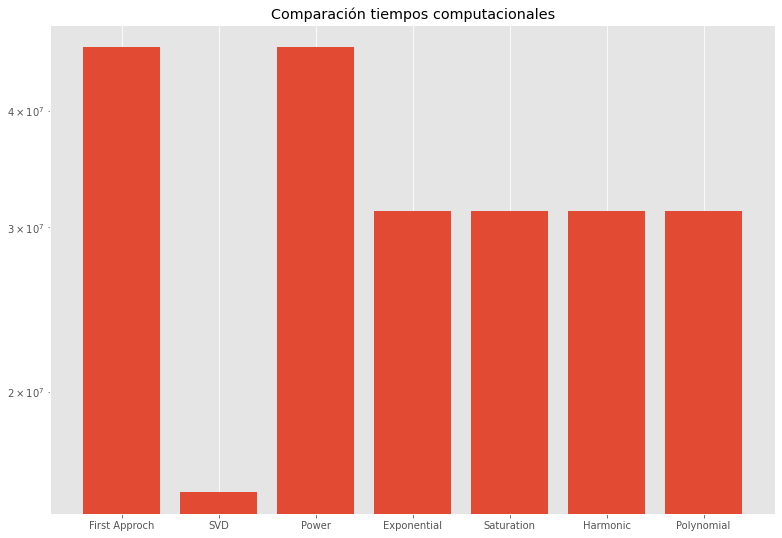

In [15]:
time = [time_f, time_svd, time_power, time_e, time_s, time_h, time_poly]
Models = ['First Approch', 'SVD', 'Power', 'Exponential', 'Saturation', 'Harmonic', 'Polynomial']

figure(figsize=(13,9))
plt.bar(Models, time)
plt.yscale("log")
plt.title('Comparación tiempos computacionales')

## Conclusiones

* Se visualiza que para cada tipo de datos se ajusta el método adecuado.
* En cada tipo de corrida el método que mejor se ajusta a los diferentes tipos de datos en el polynomial debido a que tiene más posibilidad de variación.
* En la comparación de tiempos computacionales se evidencia que debido a la rapidez de la solución del problema, el tiempo no es representativo de lo esperado para el problema, sin embargo, en algunos casos se evidencia que el método que presenta mayor tiempo computacional es el polynomial.